In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
customer_df = pd.read_csv('customerdata.csv',low_memory=False)
customer_df.head()

,name,DELIVERY_DATE,CUSTOMER_ID,id,TIME_CREATED,product_item_id,PRODUCT_NAME,CATEGORY,QUANTITY,DELIVERY_QUANTITY,status,COMPLAINT_REASON,UNIT_MEASURE,code,PACKAGING,MRP,UNIT_PRICE,DISCOUNT
0,Bangalore,2021-03-07T00:00:00.000+05:30,24,23181828,2021-03-06T07:15:05.000+05:30,41534,Nandini Shubham-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,22.0,22.0,0.0
1,Bangalore,2021-03-07T00:00:00.000+05:30,24,23181828,2021-03-06T07:15:05.000+05:30,41540,Nandini Toned Milk-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,19.0,19.0,0.0
2,Bangalore,2021-03-07T00:00:00.000+05:30,33,23181829,2021-03-06T07:15:05.000+05:30,41569,Heritage Toned Milk-500ML Pouch,Milk,3,3,DELIVERED,NaN,500.0,ML,Pouch,21.0,21.0,0.0
3,Bangalore,2021-03-07T00:00:00.000+05:30,144,23181830,2021-03-06T07:15:05.000+05:30,41531,Heritage Full Cream Milk-500ML Pouch,Milk,2,2,DELIVERED,NaN,500.0,ML,Pouch,26.0,26.0,0.0
4,Bangalore,2021-03-07T00:00:00.000+05:30,144,23181830,2021-03-06T07:15:05.000+05:30,41536,Nandini Samrudhi-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,23.0,23.0,0.0


In [4]:
customer_df.shape

(782409, 18)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782409 entries, 0 to 782408
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               782409 non-null  object 
 1   DELIVERY_DATE      782409 non-null  object 
 2   CUSTOMER_ID        782409 non-null  int64  
 3   id                 782409 non-null  int64  
 4   TIME_CREATED       782409 non-null  object 
 5   product_item_id    782409 non-null  int64  
 6   PRODUCT_NAME       782409 non-null  object 
 7   CATEGORY           782409 non-null  object 
 8   QUANTITY           782409 non-null  int64  
 9   DELIVERY_QUANTITY  782409 non-null  int64  
 10  status             782409 non-null  object 
 11  COMPLAINT_REASON   9054 non-null    object 
 12  UNIT_MEASURE       782409 non-null  float64
 13  code               782409 non-null  object 
 14  PACKAGING          779268 non-null  object 
 15  MRP                782243 non-null  float64
 16  UN

In [6]:
customer_df.isna().sum()

name                      0
DELIVERY_DATE             0
CUSTOMER_ID               0
id                        0
TIME_CREATED              0
product_item_id           0
PRODUCT_NAME              0
CATEGORY                  0
QUANTITY                  0
DELIVERY_QUANTITY         0
status                    0
COMPLAINT_REASON     773355
UNIT_MEASURE              0
code                      0
PACKAGING              3141
MRP                     166
UNIT_PRICE                0
DISCOUNT                  0
dtype: int64

In [7]:
popular_products = pd.DataFrame(customer_df.groupby('PRODUCT_NAME')['QUANTITY'].count())
most_popular = popular_products.sort_values('QUANTITY', ascending=False)
most_popular.head(10)

,QUANTITY
PRODUCT_NAME,
Nandini Toned Milk-500ML Pouch,85788
Nandini Shubham-500ML Pouch,61154
Nandini Curd-500ML Pouch,36564
Nandini Toned Milk-1L Pouch,34661
Nandini Samrudhi-500ML Pouch,30767
Nandini Shubham-1L Pouch,25008
Nandini Cow Milk-500ML Pouch,22265
Heritage Toned Milk-500ML Pouch,13341
Tender Coconut-1PER PIECE Shrink Wrap,12881


<AxesSubplot:xlabel='PRODUCT_NAME'>

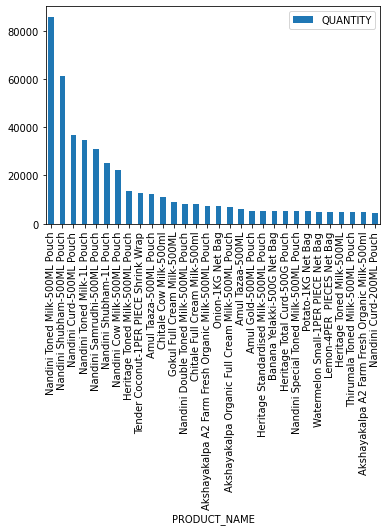

In [8]:
most_popular.head(30).plot(kind = "bar")


In [9]:
location = pd.DataFrame(customer_df.groupby('name')['id'].count())
location.head()

,id
name,
Bangalore,636394
Hyderabad,51942
Pune,94073


<AxesSubplot:xlabel='name'>

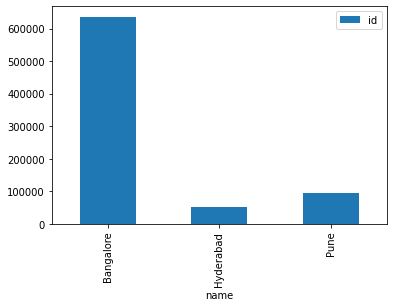

In [10]:
location.head().plot(kind = "bar")

In [11]:
test = customer_df[["id", "product_item_id"]]
test.head(100)

,id,product_item_id
0,23181828,41534
1,23181828,41540
2,23181829,41569
3,23181830,41531
4,23181830,41536
...,...,...
95,23181894,41540
96,23181896,41535
97,23181897,41532
98,23181897,41538


In [12]:
test.shape

(782409, 2)

In [13]:
test.nunique()

id                 433752
product_item_id      3273
dtype: int64